In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
#dataset seprated in batch
batchSize=130
#number  classes in output layer numbers length 0-9 (10 values)
noClass=10
# number of cycles for update weights(epocs)
epochs=2
# load mnist dataset.it split train & test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#input dataset dimention 28*28*1 1==>refered channel (gray scale image)
#no of samples in x_train=60000
# flatten image size 28*28*1=784
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normailzed to 0 &1
x_train /=255
x_test /=255

print(x_train.shape[0],"train sample")
print(x_test.shape[0],"test sample")
#create class vector to binary class matrices example (1)=0100000000
y_train=keras.utils.to_categorical(y_train,noClass)
y_test=keras.utils.to_categorical(y_test,noClass)
print(y_train[0],"after converting lable to categorical")


60000 train sample
10000 test sample
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] after converting lable to categorical


# printing a sample data from data set

lable: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


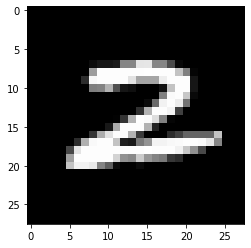

In [3]:
print('lable:',y_train[199:200])
plt.imshow(x_train[199:200].reshape(28,28),cmap='gray')
plt.show()


In [4]:
first_layer_nodes=40
#model sequently add layer
model=Sequential()
#create first layer
model.add(Dense(first_layer_nodes,activation='sigmoid',input_shape=(784,)))
#create 2 hidden layer
model.add(Dense(40,activation='sigmoid'))
#create 2 hidden layer
model.add(Dense(40,activation='sigmoid'))
#last layer
model.add(Dense(noClass,activation='softmax'))

In [5]:
# show model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
Total params: 35,090
Trainable params: 35,090
Non-trainable params: 0
_________________________________________________________________


# get initiall random weights

In [6]:
# for get initiall random weights
print((model.layers[0]).get_weights())


[array([[ 0.03130753,  0.0057411 , -0.0644053 , ...,  0.03942031,
        -0.07111591, -0.0108846 ],
       [-0.08477032, -0.01567047, -0.0697853 , ..., -0.07907654,
        -0.02297001, -0.03912625],
       [-0.00192557, -0.04272625, -0.02644745, ..., -0.07030632,
         0.01550114,  0.0451033 ],
       ...,
       [ 0.02881292,  0.01118018,  0.01527344, ...,  0.01456925,
        -0.04793654,  0.05413361],
       [ 0.07236274, -0.01887196,  0.08222674, ...,  0.00361787,
         0.02372377, -0.01802428],
       [ 0.0694274 ,  0.08281082,  0.01280976, ..., -0.03206911,
        -0.06438898, -0.00868027]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)]


# to get initiall random weights in graph

shape of first layer (784, 40)


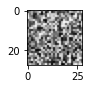

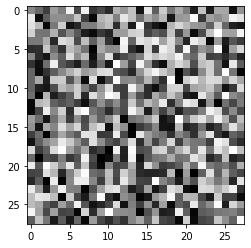

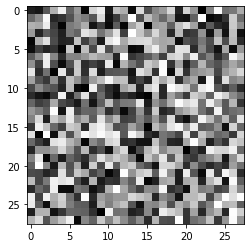

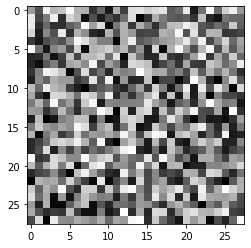

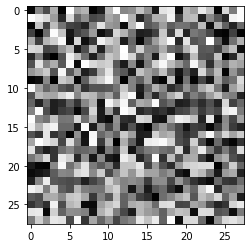

In [7]:
w=[]
for i in model.layers:
    weights=i.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("shape of first layer",layer1.shape)
fig=plt.figure(figsize=(12,12))
colum=8
rows=10

for i in range(1,6):
    fig.add_subplot(rows,colum,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
    plt.show()

In [8]:
#it use to compile our model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


# let's start to train the model

In [13]:
train= model.fit(x_train,y_train,batch_size=batchSize,verbose=1,epochs=epochs)

Epoch 1/2
60000/60000 [==============================] - 5s 76us/step - loss: 0.1350 - accuracy: 0.9615
Epoch 2/2
60000/60000 [==============================] - 4s 68us/step - loss: 0.1250 - accuracy: 0.9642


# to get trained weights in graph

shape of first layer (784, 40)


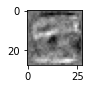

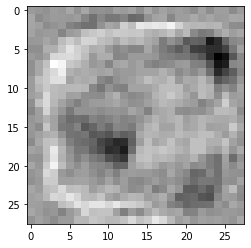

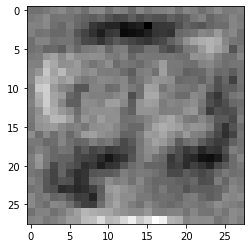

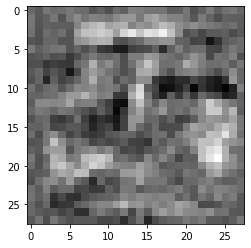

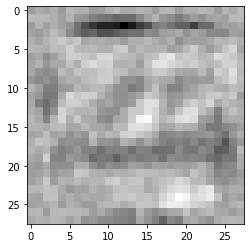

In [14]:
w=[]
for i in model.layers:
    weights=i.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("shape of first layer",layer1.shape)
fig=plt.figure(figsize=(12,12))
colum=8
rows=10

for i in range(1,6):
    fig.add_subplot(rows,colum,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
    plt.show()

In [19]:
score=model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 1s 115us/step


In [20]:

print("loss:",score[0])
print("accuracy:",score[1])

loss: 0.18653356004059315
accuracy: 0.9480000138282776


# Testing our model

In [26]:
predict=model.predict(x_train[455:456])
predict=predict[0]

print("output:",(predict>0.5))

output: [False  True False False False False False False False False]


# store the trained model

In [ ]:
# seralize model to json
model_json=model.to_json()
#vwrite model on file name
with open ("model.json","w")as mj:
     mj.write(model_json)
#write trained weights    
model.save_weights("model.h5")
print("model saved")
    